In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

welfare = raw_welfare.copy()

In [4]:
welfare = welfare.rename(
    columns = {'h14_g3' : 'sex',
              'h14_g4' : 'birth',
              'h14_g10' : 'marrage_type',
              'h14_g11' : 'religion',
              'p1402_8aq1' : 'income',
              'h14_eco9' : 'code_job',
              'h14_reg7' : 'code_region'})

In [5]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

In [7]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<AxesSubplot:xlabel='sex', ylabel='mean_income'>

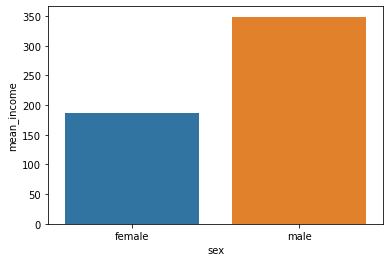

In [8]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

In [9]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

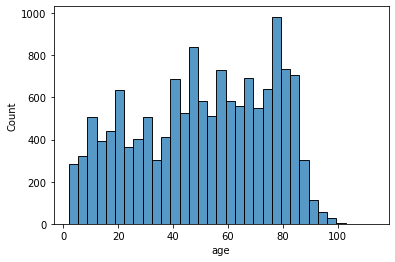

In [10]:
sns.histplot(data = welfare, x = 'age')

In [11]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,age,mean_income
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471


<AxesSubplot:xlabel='age', ylabel='mean_income'>

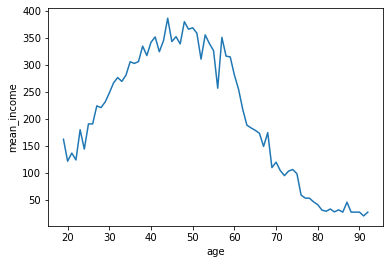

In [12]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

In [13]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                        np.where(welfare['age'] <= 59, 'middle', 'old')))

welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

<AxesSubplot:xlabel='ageg', ylabel='count'>

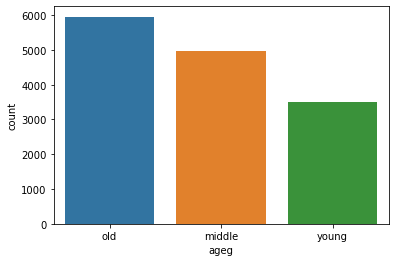

In [14]:
sns.countplot(data = welfare, x = 'ageg')

In [15]:
ageg_income = welfare.dropna(subset = ['income']) \
                    .groupby('ageg', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

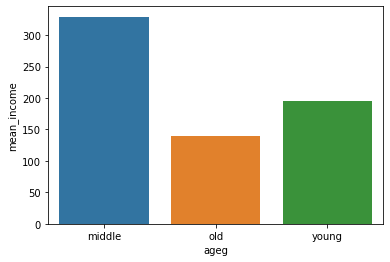

In [16]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

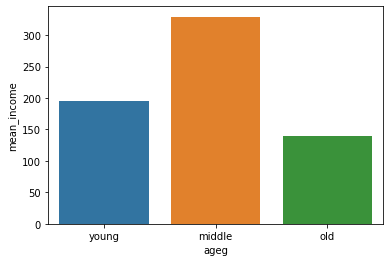

In [17]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
           order = ['young', 'middle', 'old'])